# Implementation of Random Forest Regression algorithm using python

Prepared by : Swaminathan Ayyappan 

Email : swamynathanayyappan@gmail.com

LinkedIn : linkedin.com/in/swaminathan-ayyappan-60b685175/

Problem description :

           You have been provided with an dataset that contains employees salary based on their level,consider that an a very famous Multinational corporation has been appointed you as a data scientist in this scenario if that company is  hiring an experienced employee to their concern, he/she is saying that they had been given $160k+ as their salary with  an experience of 6 years in their past working company , such that your company is raising a question that to verify    that the new recruited employee is telling truth or bluff.

And the data set contains :

i)Position - Working position of the employee.

ii)Level - Their working level based on their position.

iii)Salary - Their respective salary based upon their level

The dataset for this project is already posted on the github repository..

In [1]:
"""
i)Pandas - Used for handling dataset.

ii)numpy - stands for numerical python to handle arrays.

iii)matplotlib - To visualize our dataset and here 'pyplot' refers to making of statistical plots.

iv)seaborn - Advanced visualization library than matplotlib helps to visualize the dataset.

Note :

The %matplotlib inline helps to visualize the plots within the notebook itself.

"""
#Importing libraries like pandas,numpy,matplotlib and seaborn and their explanations are given above.
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns  
%matplotlib inline  

In [2]:
#Importing the salary position dataset into a single variable salary_pos with the help of pandas library.
salary_pos=pd.read_csv('F:/STUDY MATERIALS/[FreeCourseSite.com] Udemy - Machine Learning A-Z™ Hands-On Python & R In Data Science/Datasets/Machine Learning A-Z New/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/Position_Salaries.csv')

# Exploratory Data Analysis (EDA): 

In [3]:
#Viewing the first five entries in the salary_pos dataset.
salary_pos.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
#provides entire information of the salary_pos dataset.
salary_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
#given entire description of the numerical values of the salary_pos dataset.
salary_pos.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [6]:
#Viewing the last five entries in the salary_pos dataset.
salary_pos.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
#Displaying the column names / attributes in the salary_pos dataset 
salary_pos.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [8]:
#To know about the number of rows and columns in the salary_pos dataset 
salary_pos.shape

(10, 3)

In [9]:
#To verify any null values present in the salary_pos dataset 
salary_pos.isna().any()

Position    False
Level       False
Salary      False
dtype: bool

In [10]:
#To know about the each value's presence in the particular column (Position) of the salary_pos dataset.
salary_pos['Position'].value_counts()

C-level              1
Country Manager      1
Senior Consultant    1
Partner              1
Manager              1
CEO                  1
Senior Partner       1
Junior Consultant    1
Region Manager       1
Business Analyst     1
Name: Position, dtype: int64

In [11]:
#To know about the each value's presence in the particular column (Level) of the salary_pos dataset.
salary_pos['Level'].value_counts()

10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
2     1
1     1
Name: Level, dtype: int64

In [12]:
#To know about the each value's presence in the particular column (Salary) of the salary_pos dataset.
salary_pos['Salary'].value_counts()

150000     1
60000      1
300000     1
200000     1
45000      1
110000     1
500000     1
1000000    1
80000      1
50000      1
Name: Salary, dtype: int64

In [13]:
#To understand about the correlation between each attributes in the salary_pos dataset.
salary_pos.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


# Data visualization

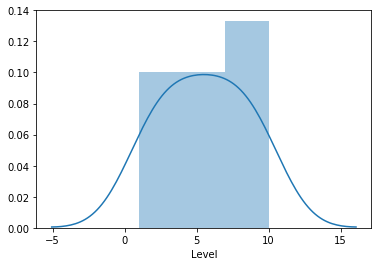

In [14]:
#To create a ditance plot of the Level column in the salary_pos dataset
sns.distplot(salary_pos['Level'])
plt.show()

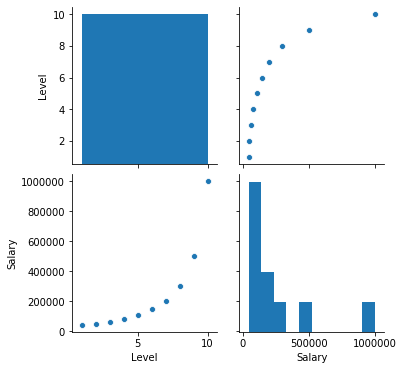

In [15]:
#To create a pair plot of the every numerical values in the salary_pos dataset
sns.pairplot(salary_pos)
plt.show()

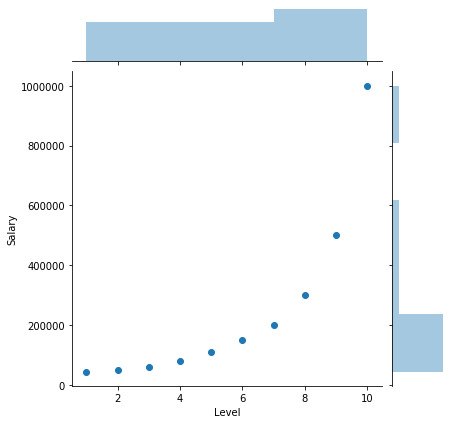

In [16]:
#Creates a joint plot for the attributes Level and salary present in the salary_pos dataset.
sns.jointplot('Level','Salary',data=salary_pos)
plt.show()

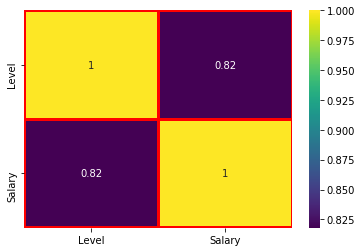

In [17]:
#To visualize the correlation of the attributes present inside the salary_pos dataset using a heatmap.
sns.heatmap(salary_pos.corr(),cmap='viridis',annot=True,linewidth=2,linecolor='red')
plt.show()

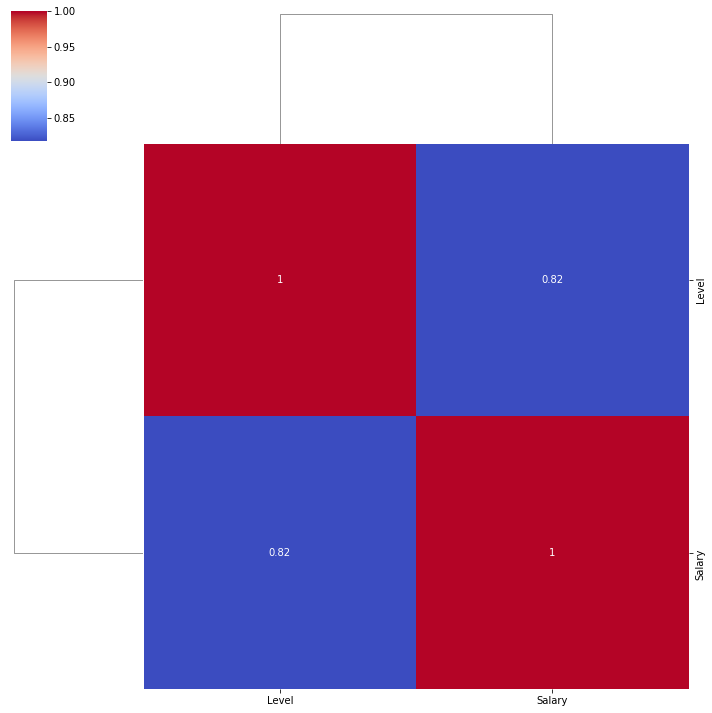

In [18]:
#To visualize the correlation of the attributes present inside the salary dataset using a clustermap.
sns.clustermap(salary_pos.corr(),cmap='coolwarm',annot=True)
plt.show()

# Dependent and Independent variable allocation

Inorder to execute simple linear regression algorithm we want to seperate the dependent and independent values in the dataset

where,

X->Independent variable

y->Dependent variable

So in our datset the 'Salary' is purely dependent on the 'Level' so in this case we need to allocate Level for X variable and Salary for y variable.

In [19]:
X=salary_pos.iloc[:,1:2].values  # 2 Dimensional array that holds the value of Level from the dataset.
y=salary_pos.iloc[:,2].values  # 2 Dimensional array that holds the value of Salary from the dataset.

Here we are not having the necessity of doing train test split since our problem lies within the datapoints itself , it is sufficient to proceed without any train and test split.

# Importing Random Forest Regressor from scikit learn library

In [20]:
#Importing Randomforestregressor class from scikit learn(sklearn) library under ensemble package.
from sklearn.ensemble import RandomForestRegressor

# Model - I : Initializing the model (RF_reg) with number of estimators as 10 (trees)

In [21]:
#Instantiating our model(creation of an object to our decision tree regression model) for our randomforest regressor class as (RF_reg)
#Instantiating with the number of trees as 10.
RF_reg=RandomForestRegressor(n_estimators=10,random_state=0)

# Fitting/training RF_reg model with our dataset.

In [22]:
#Training our random forest regressor model (RF_reg) with our dataset.
RF_reg.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [23]:
#Assigning the predicted Random forest regressor values for 100 estimators to y_pred_reg2 variable.
y_pred=RF_reg.predict(X)

Printing the predicted results of our model (RF_reg) for 10 estimators

In [24]:
#Predicting the salary of our employee using randomforestregressor model for 100 estimators.
print('The predicted salary of the employee which he/she had got from their previous company : $',float(RF_reg.predict([[6.5]])))

The predicted salary of the employee which he/she had got from their previous company : $ 167000.0


# Model's accuracy (RF_reg):

Evaluation metrics for the Random Forest Regressor (RF_reg) model with 10 estimators (trees).

i)Using score method

In [25]:
RF_reg.score(X,y)*100 #Random forest model with 10 estimators

97.04434230386582

In [26]:
#Using Evaluation metrics like MAE,MSE,RMSE 
#Importing mean_absolute_error (MAE) , Mean_squared_error (MSE) class from scikit learn library under metrics package.
from sklearn.metrics import mean_absolute_error,mean_squared_error

ii)Mean absolute error (MAE) :

In [27]:
#Prints the mean absolute error (MAE) of the Random forest regressor model (RF_reg) with 10 estimators.
print(mean_absolute_error(y_pred,y))

22700.0


iii)Mean Squared error (MSE) :

In [28]:
#Prints the mean squared error (MSE) of the Random forest regressor model (RF_reg) with 10 estimators.
print(mean_squared_error(y_pred,y))

2384100000.0


iv)Root Mean squared error (RMSE):

In [29]:
#Prints the Root mean squared error (RMSE) of the Random forest regressor model (RF_reg) with 10 estimators.
print(np.sqrt(mean_squared_error(y_pred,y)))

48827.24649209701


Visualization of RF_reg model results

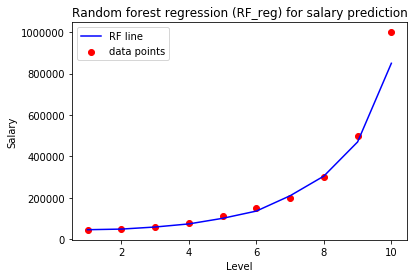

In [30]:
plt.scatter(X,y,color='red',label='data points') #Creates a scatter plot of our datapoints.
plt.plot(X,y_pred,color='blue',label='RF line') #Creates a line plot of our training dataset with our predicted values of RF_reg model. 
plt.title('Random forest regression (RF_reg) for salary prediction')  #Gives title to our plot.
plt.xlabel('Level') #Gives title to 'X Axis'.
plt.ylabel('Salary') #Gives title to 'Y Axis'.
plt.legend() #Displays legend in the plot.
plt.show() #Helps to visualize within the notebook itself.

# Model - II : Initializing the model (RF_reg2) with number of estimators as 100 (trees)

In [31]:
#Instantiating our model(creation of an object to our decision tree regression model) for our randomforest regressor class as (RF_reg2)
#Instantiating with the number of trees as 100.
RF_reg2=RandomForestRegressor(n_estimators=100,random_state=0)

# Fitting/training RF_reg2 model with our dataset.

In [32]:
#Training our random forest regressor model (RF_reg2) with our dataset.
RF_reg2.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [33]:
#Assigning the predicted Random forest regressor values for 100 estimators to y_pred_reg2 variable.
y_pred_reg2=RF_reg2.predict(X)

Printing the predicted results of our model (RF_reg2) for 100 estimators

In [34]:
#Predicting the salary of our employee using randomforestregressor model for 100 estimators.
print('The predicted salary of the employee which he/she had got from their previous company : $',float(RF_reg2.predict([[6.5]])))

The predicted salary of the employee which he/she had got from their previous company : $ 158300.0


# Model's accuracy (RF_reg2) :

Evaluation metrics for the Random Forest Regressor (RF_reg2) model with 100 estimators (trees).

i)Using score method

In [35]:
RF_reg2.score(X,y)*100 #Random forest model with 100 estimators

93.78393331453066

ii)Mean absolute error (MAE) :

In [36]:
#Prints the mean absolute error (MAE) of the Random forest regressor model (RF_reg2) with 100 estimators.
print(mean_absolute_error(y_pred_reg2,y))

26955.0


iii)Mean Squared error (MSE) :

In [37]:
#Prints the mean squared error (MSE) of the Random forest regressor model (RF_reg2) with 100 estimators.
print(mean_squared_error(y_pred_reg2,y))

5014019250.0


iv)Root Mean squared error (RMSE):

In [38]:
#Prints the Root mean squared error (RMSE) of the Random forest regressor model (RF_reg2) with 100 estimators.
print(np.sqrt(mean_squared_error(y_pred_reg2,y)))

70809.73979616081


Visualization of RF_reg2 model results

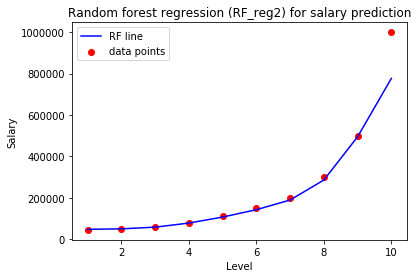

In [39]:
plt.scatter(X,y,color='red',label='data points') #Creates a scatter plot of our datapoints.
plt.plot(X,y_pred_reg2,color='blue',label='RF line') #Creates a line plot of our training dataset with our predicted values of RF_reg2 model. 
plt.title('Random forest regression (RF_reg2) for salary prediction')  #Gives title to our plot.
plt.xlabel('Level') #Gives title to 'X Axis'.
plt.ylabel('Salary') #Gives title to 'Y Axis'.
plt.legend() #Displays legend in the plot.
plt.show() #Helps to visualize within the notebook itself.

# Model - III : Initializing the model (RF_reg3) with number of estimators as 300 (trees)

In [40]:
#Instantiating our model(creation of an object to our decision tree regression model) for our randomforest regressor class as (RF_reg3)
#Instantiating with the number of trees as 300.
RF_reg3=RandomForestRegressor(n_estimators=300,random_state=0)

# Fitting/training RF_reg3 model with our dataset.

In [41]:
#Training our random forest regressor model (RF_reg3) with our dataset.
RF_reg3.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [42]:
#Assigning the predicted Random forest regressor values for 300 estimators to y_pred_reg3 variable.
y_pred_reg3=RF_reg3.predict(X)

Printing the predicted results of our model (RF_reg3) for 300 estimators

In [43]:
#Predicting the salary of our employee using randomforestregressor model for 300 estimators.
print('The predicted salary of the employee which he/she had got from their previous company : $',float(RF_reg3.predict([[6.5]])))

The predicted salary of the employee which he/she had got from their previous company : $ 160333.33333333334


# Model's accuracy (RF_reg3):

Evaluation metrics for the Random Forest Regressor (RF_reg3) model with 300 estimators (trees).

i)Using score method

In [44]:
RF_reg3.score(X,y)*100 #Random forest model with 300 estimators

95.28814067299139

ii)Mean absolute error (MAE) :

In [45]:
#Prints the mean absolute error (MAE) of the Random forest regressor model (RF_reg3) with 300 estimators.
print(mean_absolute_error(y_pred_reg3,y))

24925.000000000007


iii)Mean Squared error (MSE) :

In [46]:
#Prints the mean squared error (MSE) of the Random forest regressor model (RF_reg3) with 300 estimators.
print(mean_squared_error(y_pred_reg3,y))

3800691750.0000014


iv)Root Mean squared error (RMSE):

In [47]:
#Prints the Root mean squared error (RMSE) of the Random forest regressor model (RF_reg3) with 300 estimators.
print(np.sqrt(mean_squared_error(y_pred_reg3,y)))

61649.75060776809


Visualization of RF_reg3 model results

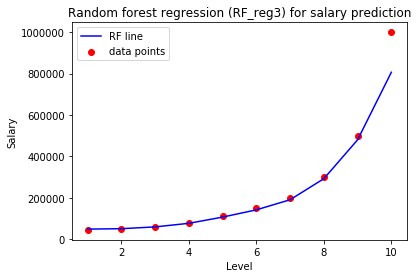

In [48]:
plt.scatter(X,y,color='red',label='data points') #Creates a scatter plot of our datapoints.
plt.plot(X,y_pred_reg3,color='blue',label='RF line') #Creates a line plot of our training dataset with our predicted values of RF_reg3 model. 
plt.title('Random forest regression (RF_reg3) for salary prediction')  #Gives title to our plot.
plt.xlabel('Level') #Gives title to 'X Axis'.
plt.ylabel('Salary') #Gives title to 'Y Axis'.
plt.legend() #Displays legend in the plot.
plt.show() #Helps to visualize within the notebook itself.

From the above predictions we can see that the RF_reg model performs better than other models and thus we came to a conclusion that the employee is true about his/her salary which they had got in their previous concern.